> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate TMDb Movie

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# import packages to load and analyze data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure visualizations are plotted within Jupyter notebook
% matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
#load and read tmdb-movies.csv file
df = pd.read_csv('tmdb-movies.csv')

#print first 5 rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.query('revenue_adj != 0 and budget_adj != 0').describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,39888.783398,1.191400,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,67213.815955,1.475002,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,6074.000000,0.462448,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,11322.000000,0.797298,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,38577.000000,1.368245,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# list column attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
df['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [9]:
col = ['genres', 'original_title', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']
df_new = df[col]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
genres            10843 non-null object
original_title    10866 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 679.2+ KB


In [10]:
df_new.head()

,genres,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Action|Adventure|Science Fiction|Thriller,Jurassic World,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,Action|Adventure|Science Fiction|Thriller,Mad Max: Fury Road,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,Adventure|Science Fiction|Thriller,Insurgent,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,Action|Adventure|Science Fiction|Fantasy,Star Wars: The Force Awakens,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,Action|Crime|Thriller,Furious 7,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [11]:
df_new.describe()

,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
df_new.duplicated().sum()

1

In [13]:
df_new[df_new.duplicated()]

,genres,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,Crime|Drama|Action|Thriller|Science Fiction,TEKKEN,3/20/2010,110,5.0,2010,30000000.0,967000.0


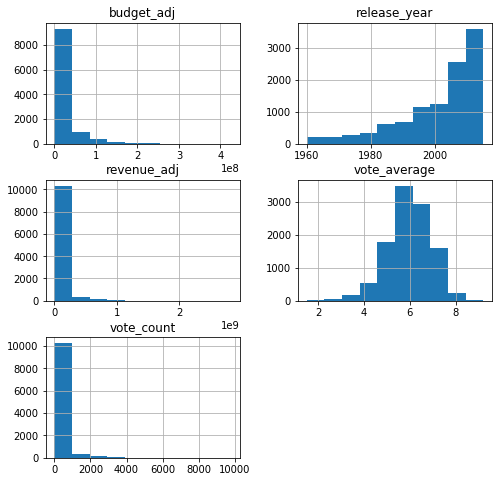

In [14]:
df_new.hist(figsize = (8, 8));

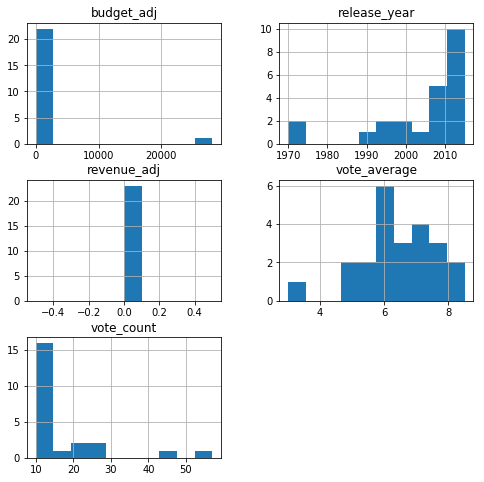

In [15]:
df_new[df_new.genres.isnull()].hist(figsize = (8,8));

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [16]:
# drop duplicates
df_new = df_new.drop_duplicates()
df_new.duplicated().sum()

0

In [17]:
# convert release_date to datetime
df_new['release_date'] = pd.to_datetime(df_new['release_date'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
genres            10842 non-null object
original_title    10865 non-null object
release_date      10865 non-null datetime64[ns]
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 763.9+ KB


In [18]:
#drop rows where genres is null
df_new = df_new.dropna()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 8 columns):
genres            10842 non-null object
original_title    10842 non-null object
release_date      10842 non-null datetime64[ns]
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 762.3+ KB


In [19]:
#create a new dataframe where genre column where values separated by '|' will be added as new rows

# all genres have separators
df_new['genres'].str.contains('|').sum()



10842

In [20]:
df_new.head()

,genres,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Action|Adventure|Science Fiction|Thriller,Jurassic World,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09
1,Action|Adventure|Science Fiction|Thriller,Mad Max: Fury Road,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08
2,Adventure|Science Fiction|Thriller,Insurgent,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08
3,Action|Adventure|Science Fiction|Fantasy,Star Wars: The Force Awakens,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09
4,Action|Crime|Thriller,Furious 7,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09


In [21]:
df_new['genres'][3]

'Action|Adventure|Science Fiction|Fantasy'

In [22]:
test = df_new[:6]
col_g = list(test.columns)
col_g[1:]

['original_title',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [23]:
df_g = df_new.set_index(col_g[1:]).stack().str.split('|', expand=True).stack().unstack(-2).reset_index(-1, drop=True).reset_index()
df_g.head()

,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,$5 a Day,2008-01-01,12,5.4,2008,0.0,0.000,Drama
1,$5 a Day,2008-01-01,12,5.4,2008,0.0,0.000,Comedy
2,$9.99,2008-09-04,18,6.1,2008,0.0,0.000,Animation
3,$9.99,2008-09-04,18,6.1,2008,0.0,0.000,Drama
4,'71,2014-10-10,274,6.6,2014,0.0,1497553.122,Thriller


In [24]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26955 entries, 0 to 26954
Data columns (total 8 columns):
original_title    26955 non-null object
release_date      26955 non-null datetime64[ns]
vote_count        26955 non-null int64
vote_average      26955 non-null float64
release_year      26955 non-null int64
budget_adj        26955 non-null float64
revenue_adj       26955 non-null float64
genres            26955 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 1.6+ MB


In [25]:
df_g.describe()

,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,26955.000000,26955.000000,26955.000000,2.695500e+04,2.695500e+04
mean,249.999777,5.956535,2000.698423,2.103946e+07,6.088986e+07
std,638.020401,0.911927,12.764378,3.820031e+07,1.615305e+08
min,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,44.000000,6.000000,2005.000000,1.823126e+02,0.000000e+00
75%,173.000000,6.600000,2011.000000,2.704173e+07,4.376460e+07
max,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [26]:
#check to make sure the row count populated as expected (should be same as def_g)
pd.Series(df_new['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False).sum()


26955

In [27]:
df_g.groupby('genres').revenue_adj.mean()

genres
Action             9.175827e+07
Adventure          1.416752e+08
Animation          8.525613e+07
Comedy             4.789700e+07
Crime              5.663641e+07
Documentary        2.258210e+06
Drama              4.041714e+07
Family             8.773671e+07
Fantasy            1.112342e+08
Foreign            1.784286e+06
History            4.794858e+07
Horror             2.408271e+07
Music              4.665592e+07
Mystery            5.088930e+07
Romance            4.820022e+07
Science Fiction    8.697842e+07
TV Movie           3.496353e+05
Thriller           5.528610e+07
War                6.998611e+07
Western            4.610126e+07
Name: revenue_adj, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### 1.	How has movie production trend over years?

In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 8 columns):
genres            10842 non-null object
original_title    10842 non-null object
release_date      10842 non-null datetime64[ns]
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 1.1+ MB


In [29]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
movie_cnt = df_new.groupby('release_year').count().genres
movie_cnt

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     40
1971     55
1972     40
1973     55
1974     46
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    136
1990    132
1991    133
1992    133
1993    178
1994    184
1995    174
1996    203
1997    192
1998    210
1999    224
2000    226
2001    241
2002    266
2003    281
2004    307
2005    363
2006    408
2007    438
2008    495
2009    531
2010    487
2011    540
2012    584
2013    656
2014    699
2015    627
Name: genres, dtype: int64

In [30]:
year = sorted(df_new.release_year.unique())
year

[1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

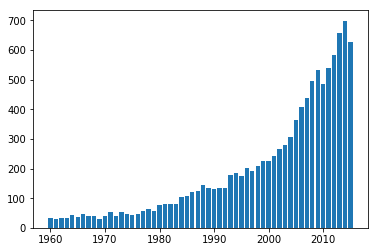

In [31]:
plt.bar(year, movie_cnt);

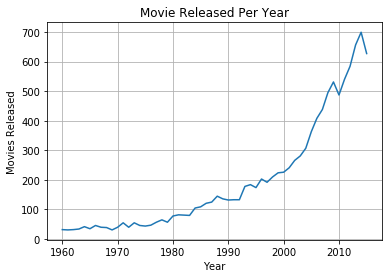

In [32]:
yearly_movie = df_new.release_year.value_counts().sort_index()
plt.plot(yearly_movie);
plt.grid();
plt.ylabel('Movies Released');
plt.xlabel('Year');
plt.title('Movie Released Per Year');

### 2. When was the top 20 highest revenue movie produce?

In [33]:
top20 = df_new.nlargest(20, 'revenue_adj').sort_values('release_year')

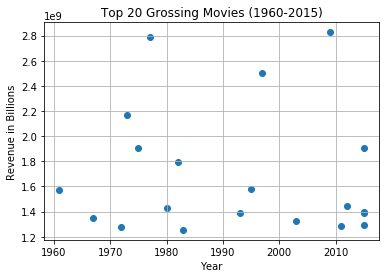

In [34]:
plt.scatter(top20.release_year, top20.revenue_adj);
plt.grid();
plt.ylabel('Revenue in Billions');
plt.xlabel ('Year');
plt.title('Top 20 Grossing Movies (1960-2015)');

In [35]:
top20.sort_values('revenue_adj', ascending = False)

,genres,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,Action|Adventure|Fantasy|Science Fiction,Avatar,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
1329,Adventure|Action|Science Fiction,Star Wars,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09
5231,Drama|Romance|Thriller,Titanic,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09
10594,Drama|Horror|Thriller,The Exorcist,1973-12-26,1113,7.2,1973,3.928928e+07,2.167325e+09
9806,Horror|Thriller|Adventure,Jaws,1975-06-18,1415,7.3,1975,2.836275e+07,1.907006e+09
3,Action|Adventure|Science Fiction|Fantasy,Star Wars: The Force Awakens,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
8889,Science Fiction|Adventure|Family|Fantasy,E.T. the Extra-Terrestrial,1982-04-03,1830,7.2,1982,2.372625e+07,1.791694e+09
8094,Crime|Drama|Mystery|Thriller|Action,The Net,1995-07-28,201,5.6,1995,3.148127e+07,1.583050e+09
10110,Adventure|Animation|Comedy|Family,One Hundred and One Dalmatians,1961-01-25,913,6.6,1961,2.917944e+07,1.574815e+09
4361,Science Fiction|Action|Adventure,The Avengers,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09


###  3.	Is there a relationship between genre and revenue?

In [36]:
df_g.query('revenue_adj == 0').shape

(14291, 8)

In [37]:
# remove rows where revenue is 0
df_g = df_g.query('revenue_adj != 0')

# check no revenue of 0
df_g.query('revenue_adj == 0').shape

(0, 8)

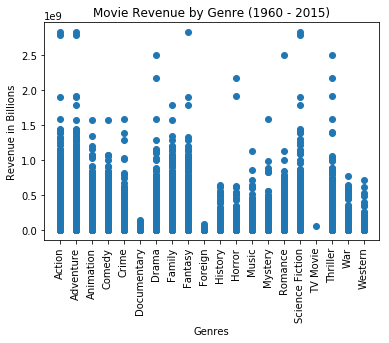

In [38]:
#plt.figure(figsize = (6,6));
plt.scatter(df_g.genres, df_g.revenue_adj);
plt.xticks(rotation = 90);
plt.xlabel('Genres');
plt.ylabel('Revenue in Billions');
plt.title('Movie Revenue by Genre (1960 - 2015)');

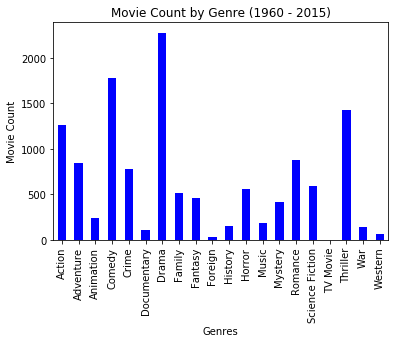

In [39]:
#plt.figure(figsize = (7,7));
df_g.genres.value_counts().sort_index().plot.bar(color = 'blue');
plt.title('Movie Count by Genre (1960 - 2015)');
plt.xlabel('Genres');
plt.ylabel('Movie Count');

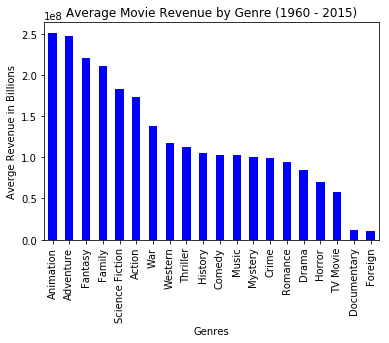

In [40]:
df_g.groupby('genres').mean().revenue_adj.sort_values(ascending = False).plot.bar(color = 'blue');
plt.xlabel('Genres');
plt.ylabel('Averge Revenue in Billions');
plt.title('Average Movie Revenue by Genre (1960 - 2015)');

### 4.	Is there a relationship between budget and revenue?

In [45]:
df_r = df_new.query('revenue_adj != 0').copy() #make a copy to avoid chained assignment
df_r.query('revenue_adj == 0').shape, df_r.shape

((0, 9), (4849, 9))

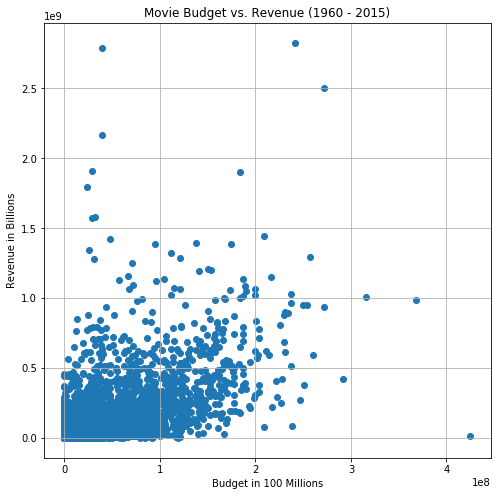

In [42]:
plt.figure(figsize = (8,8));
plt.scatter(df_r.budget_adj, df_r.revenue_adj);
plt.grid();
plt.xlabel('Budget in 100 Millions');
plt.ylabel('Revenue in Billions');
plt.title('Movie Budget vs. Revenue (1960 - 2015)');

### 5. Is there a relationship between rating and profit?

In [44]:
df_new['profit'] = df_new.revenue_adj - df_r.budget_adj
df_new.head()

,genres,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,Action|Adventure|Science Fiction|Thriller,Jurassic World,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
1,Action|Adventure|Science Fiction|Thriller,Mad Max: Fury Road,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,2.101614e+08
2,Adventure|Science Fiction|Thriller,Insurgent,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08,1.704191e+08
3,Action|Adventure|Science Fiction|Fantasy,Star Wars: The Force Awakens,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,1.718723e+09
4,Action|Crime|Thriller,Furious 7,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09,1.210949e+09


In [46]:
df_r['profit'] = df_r.revenue_adj - df_r.budget_adj
df_r.head()

,genres,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,Action|Adventure|Science Fiction|Thriller,Jurassic World,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
1,Action|Adventure|Science Fiction|Thriller,Mad Max: Fury Road,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,2.101614e+08
2,Adventure|Science Fiction|Thriller,Insurgent,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08,1.704191e+08
3,Action|Adventure|Science Fiction|Fantasy,Star Wars: The Force Awakens,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,1.718723e+09
4,Action|Crime|Thriller,Furious 7,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09,1.210949e+09


In [304]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 9 columns):
genres            4849 non-null object
original_title    4849 non-null object
release_date      4849 non-null datetime64[ns]
vote_count        4849 non-null int64
vote_average      4849 non-null float64
release_year      4849 non-null int64
budget_adj        4849 non-null float64
revenue_adj       4849 non-null float64
profit            4849 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 378.8+ KB


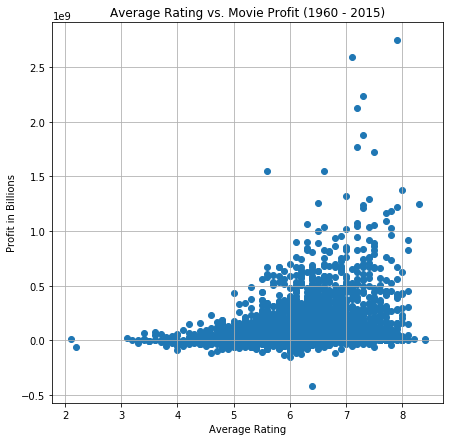

In [305]:
plt.figure(figsize = (7,7));
plt.scatter(df_r.vote_average, df_r.profit);
plt.grid();
plt.xlabel('Average Rating');
plt.ylabel('Profit in Billions');
plt.title('Average Rating vs. Movie Profit (1960 - 2015)');

### 6.	Are there months of the year that seen significantly higher revenue? What are the top 3 months?

In [47]:
df_r['release_month'] = df_r['release_date'].dt.month

In [307]:
df_r.head()

,genres,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_month
0,Action|Adventure|Science Fiction|Thriller,Jurassic World,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09,6
1,Action|Adventure|Science Fiction|Thriller,Mad Max: Fury Road,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,2.101614e+08,5
2,Adventure|Science Fiction|Thriller,Insurgent,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08,1.704191e+08,3
3,Action|Adventure|Science Fiction|Fantasy,Star Wars: The Force Awakens,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,1.718723e+09,12
4,Action|Crime|Thriller,Furious 7,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09,1.210949e+09,4


<Container object of 12 artists>

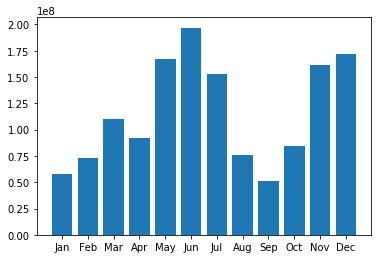

In [341]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']
avg = df_r.groupby('release_month').revenue_adj.mean()
location = np.arange(len(avg))
plt.bar(location, avg, tick_label = months);

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [242]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0